# Artificial Neural Networks

In this notebook, I explore the topic of Artificial Neural Networks (ANN's). This notebook starts off by introducing the MNIST dataset and classification problem. Then I give an overview of artificial neural networks: how the function, how to train them, and where they get used. I also show you how to do this all with the Tensorflow library in Python. I conclude with some mathematical remarks and general data science considerations.

## The MNIST Dataset

![title](images/mnist.gif)

The MNIST dataset contains 70,000 images of handwritten digits. These images are grayscale and are 28x28 pixels. The MNIST dataset is used to test the validity of different classification algorithms. Here's what the MNIST dataset actually we'll be exploring actually looks like:

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
# Download the training data.
mnist_all_data = tf.keras.datasets.mnist.load_data()

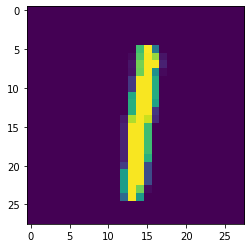

In [3]:
# Visualize a random image from the dataset
plt.imshow(mnist_all_data[0][0][40])

An algorithm that performs well will accept an image as input a produce a vector as output. More specifically, the algorithm will accept a multi-dimensional array (or matrix) as input - because images are two dimensional - and produce a one-dimensional vector with 10 elements as output. Each index in the vector corresponds to the probability that the image belongs to each of the categories. For instance, when a picture of the number $1$ is given to the algorithm, it will produce a vector like this:

$$ [0.01, 0.8813, 0.023, 0.001, 0.0045, 0.0091, 0.013, 0.056, 0.0001, 0.0002] $$

Notice that the second index, $0.8813$ (which corresponds to $1$), is much higher than any of the other indexes.

In the next section I'll explain how artificial neurons work and how they can be combined into networks. These networks will ultimately produce an output vector that accurately identifies the input image.

## The Structure of ANN's

Artificial neural networks are inspired by the actual neural networks that exist in our brains. The building blocks of neural networks are neurons, which can be thought of as simple information processing units (or cells). Biological neurons accept electrochemical input their dendrites ($x_1$ through $x_n$), pass this activation through their axon, and produce some outputs ($y_1$ through $y_n$). The outputs are altered during their course through the axon.

![title](images/biological_neuron.png)

A perceptron is a kind of artificial neuron. It has the same behavior as a biological neuron: inputs travel into a cell and an output is produced. The cell below has a single output, $output_0$. This output is the result of all the inputs being multiplied by their corresponding weights. These numbers are then summed up ($\sum$) and passed through an activation function ($\int$) before being output. Cells can have a variable number of inputs and outputs:

![title](images/perceptron.png)

These individual cells can be arranged into _layers_, where the activation from one layer is passed to all cells in the next layer. In the example below, the network has an input layer of three cells, an intermediate layer of four cells, and an output layer of three cells. Activation is passed from the first layer to the hidden layer, and the hidden layer to the output layer. Researchers involved in deep learning encounter two kinds of design tasks when working with neural networks: experimenting with different network architectures, and altering the structure of the neurons themselves.

![title](images/colored_neural_network.png)

If you're familiar with linear algebra, you might notice that it's possible to represent this network with matrix vector multiplication. For instance, the process of transforming the activation from the input layer to the hidden layer is the same as multiplying an input vector by a weight matrix, where each element in the matrix represents the weight (activation) from input cell $x$ to hidden cell $h$. $w_{2,3}$ for instance means the activation from the second input cell to the third hidden cell:

$$ \begin{bmatrix} w_{1,1} & w_{1,2} & w_{1,3} & w_{1,4} \\ w_{2,1} & w_{2,2} & w_{2,3} & w_{2,4}\\ w_{3,1} & w_{3,2} & w_{3,3} & w_{3,4} \end{bmatrix}^T
  \begin{bmatrix} x_{1} \\ x_{2} \\ x_{3} \end{bmatrix} 
  =
  \begin{bmatrix} h_{1} \\ h_{2} \\ h_{3} \\ h_{4} \end{bmatrix} $$
  
An activation function, $\sigma$, is then applied to this vector to get the outputs:

$$ \sigma = \frac{1}{1 - e^{-x}} $$

$$ y = \sigma(h) $$

This can be summarized even more succinctly like this:

$$ y = \sigma ( \mathbf{W} \mathbf{x} ) $$

We can do the same thing in Python:

In [4]:
import numpy as np

In [5]:
np.random.seed(42)

# Weights matrix, input array, and hidden activation.
W = np.random.rand(3, 4)
x = np.random.rand(3, 1)
h = np.matmul(W.T, x)
y = 1 / (1 + np.exp(-h))

In [6]:
W

array([[0.37454012, 0.95071431, 0.73199394, 0.59865848],
       [0.15601864, 0.15599452, 0.05808361, 0.86617615],
       [0.60111501, 0.70807258, 0.02058449, 0.96990985]])

In [7]:
x

array([[0.83244264],
       [0.21233911],
       [0.18182497]])

In [8]:
h

array([[0.45420974],
       [0.95328414],
       [0.62541917],
       [0.85862575]])

In [9]:
y

array([[0.61163967],
       [0.72177517],
       [0.65145005],
       [0.70237345]])

To go from the hidden layer to the output layer, we follow the same process: multiply the inputs (which in this case are the activations of the hidden layer) by the corresponding weights from them to the outputs, and apply the activation function.

Now that you understand the basic structure of an ANN, there are two things left to discuss: where to apply it and how to train it.

## Evaluating a Network

A deep learning researcher or data scientist first determines the structure of a neural network. In the previous section, we saw a network with three inputs, four hidden units, and three outputs. In the __Structure of ANN's__ section we proposed a network with _lots_ of inputs (one for each pixel: $28 x 28$) and 10 output units. After you've determined the structure of the network, you have to find some way to learn the correct weights. The weights are what will change in response to your data, and are ultimately the parameters that determine your model's output. But how do you find the right weights?

A simple method would be to guess weights. Randomly assign weights, check the model's output, and if the output is not good then randomize the weights and try again. For very simple models with only a couple parameters, this method can actually arrive at a good solution fairly quickly. However, a neural network can have millions of parameters, so this method is not effective. Instead, we need to think of the problem as minimizing an error function, and borrow tools from calculus to perform error minimization.

The error of a model is simply the distance between the desired output and the network's actual output. For instance, the output of the hypothetical network above was:

$[0.01, 0.8813, 0.023, 0.001, 0.0045, 0.0091, 0.013, 0.056, 0.0001, 0.0002]$

Whereas the true output was:

$[0., 1, 0., 0., 0., 0., 0., 0., 0., 0.]$

The total error is the sum of all these distances. A model that has a lower error is usually judged as superior to a model with higher error. A good formula for determining the error of a classifier like this is categorical cross entropy:

$$ CE = -\sum_i^C t_i log( f( x )_i ) $$

Where $C$ is the number of classes, $x$ is the input data, $f$ is the neural network, $t$ are the groundtruth labels, and $i$ indexes through all of the classes.

Let's see what this looks like in Python:

In [10]:
def cross_entropy(p, q):
    return -sum( [p[i]*np.log(q[i]) for i in range(len(p))] )

# True classes
a = [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]

# Predicted classes
b = [0.01, 0.8813, 0.023, 0.001, 0.0045, 0.0091, 0.013, 0.056, 0.0001, 0.0002]

# Badly predicted classes
c = [0.8813, 0.01, 0.023, 0.001, 0.0045, 0.0091, 0.013, 0.056, 0.0001, 0.0002]

# Add a small positive constant so that it's possible to take the log - log(0) is undefined.
const = 1/10**15
b = [i + const for i in b]
c = [i + const for i in c]

print(f"The bad predictions have a categorical cross-entropy score of {cross_entropy(a, c)}")
print(f"The more accurate prediction has a much lower cross-entropy: {cross_entropy(a, b)}")

The bad predictions have a categorical cross-entropy score of 4.605170185987991
The more accurate prediction has a much lower cross-entropy: 0.12635718887652117


The error (or loss) of a model is the categorical cross entropy averaged across all the data. In the next section I'll show you how to reduce the error of a model.

## Training a Network

As mentioned above, it's possible to randomly guess the parameters (weights) of a neural network -- but even for a modestly-sized network this would take a computer the size of the universe billions of years. Instead, we have a technique called _gradient descent_ that makes use of calculus.

The idea behind gradient descent is that the error of the model is calculated and then "propagated backwards" through the network in a "backward pass". As this happens, the weights that are responsible for the greatest amount of error are changed so that they produce less error.

When a model is trained, every time an image flows through the network it produces an output vector. This is compared to the desired vector (which will be all zero's and one's). Then the [chain rule](https://en.wikipedia.org/wiki/Chain_rule) from calculus is applied to calculate how much error each cell is responsible for. This error forms a gradient, which is the multi-dimensional form of the derivitive function. By incrementing the weight of the connection a small increment _against_ the gradient, we can reduce the overall error. 

## Building a Neural Network with Tensorflow

Now let's train a network from start to finish using the _tensorflow.keras_ library.

Notice that I start off by dividing the data into a train and a test set - this is to prevent the model from simply memorizing the input data. Because the model is trained on `x_train` and evaluated on `x_test`, we know that none of the model's training data is used for evaluation.

In [11]:
from tensorflow.keras.datasets import mnist

# Split into train and test sets.
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Divide by 255 to normalize pixed intensition to the range 0-1.
x_train, x_test = x_train / 255.0, x_test / 255.0

The model below accepts an input matrix of 28x28. It connects these input values to a hidden layer of 128 units. These units then connect to the output later of 10 units. Because each layer is fully connected, the # of parameters in each layer is simply the number of inputs times the number of outputs, i.e. $ (784 + 1) * 128 = 100480 $ (there is an additional special "bias" unit added to the input, making it 785 instead of 784):

In [12]:
# Define the model.
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10)
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


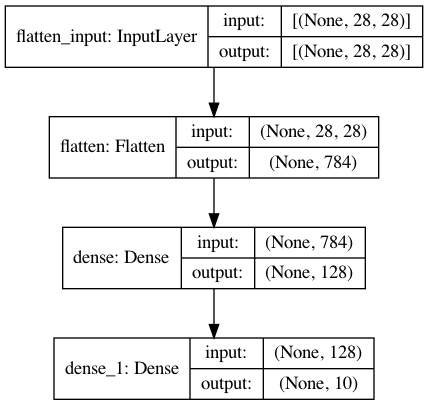

In [13]:
# Visualize the model
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True)

When we compile the model, we determine the optimizer. Better methods have been invented since backprop, and the one we're using is called _adam_. The loss function is the same as we discussed in the __Evaluating a Newtork__ section: _Categorical Cross-Entropy_:

In [14]:
# Compile the model.
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Now we run the data through the model several times. I choose 10 epochs (passes through the model) based on prior experience. You can see how the accuracy increases in the _tensorboard_ visualization defined by the callback below.

In [15]:
rm -rf ./logs/

In [16]:
import datetime

# Set up tensorboard logging
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

# Fit the model
model.fit(x_train, y_train,
          epochs=10,
          validation_data=(x_test, y_test),
          callbacks=[tensorboard_callback],
          verbose=0)

In [17]:
%load_ext tensorboard

In [18]:
%tensorboard --logdir logs/fit

Reusing TensorBoard on port 6007 (pid 17915), started 5:26:23 ago. (Use '!kill 17915' to kill it.)

In [19]:
# Evaluate the model
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 1s - loss: 0.0812 - accuracy: 0.9782


[0.08120877295732498, 0.9782000184059143]

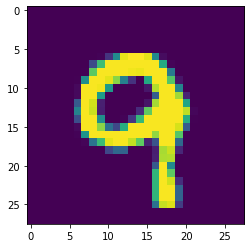

In [20]:
# Plot a random image
plt.imshow(x_test[99])

In [21]:
# How does the model classify this image?
model.predict(x_test)[99].argmax()

9

## Mathematical Considerations

Any two matrix transformations can be reduced to a single matrix transformation -- why can't we reduce a neural network to just a simple matrix transformation? That's because the activation functions introduct non-linearity, and matrix transforms are linear (affine).